In [1]:
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score, precision_score
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Flatten, Convolution2D, MaxPooling2D
from keras.models import Sequential


path = "./malimg_paper_dataset_imgs"

columns = ['className', 'file', 'path']
data = []
classes = os.listdir(path)
for folder in classes:
  if '.txt' not in folder:
    count = 0
    full_path = path + '/' + folder + '/'
    for file in os.listdir(full_path):
      data.append([folder, file, full_path + file])
df = pd.DataFrame(data=data, columns=columns)
df2 = pd.DataFrame(columns=columns)
print(classes)
for i in range(0, 26):
  temp_data = df[df['className'] == classes[i]]

  if (i == 2 or i == 3):
    temp_data = temp_data.sample(300)

  df2 = pd.concat([df2, temp_data])
df.to_csv('./df.csv', index=False, encoding='utf8')

['Adialer.C', 'Agent.FYI', 'Allaple.A', 'Allaple.L', 'Alueron.gen!J', 'Autorun.K', 'C2LOP.gen!g', 'C2LOP.P', 'Dialplatform.B', 'Dontovo.A', 'Fakerean', 'Instantaccess', 'Lolyda.AA1', 'Lolyda.AA2', 'Lolyda.AA3', 'Lolyda.AT', 'Malex.gen!J', 'malimg_dataset_readme.txt', 'Obfuscator.AD', 'Rbot!gen', 'Skintrim.N', 'Swizzor.gen!E', 'Swizzor.gen!I', 'VB.AT', 'Wintrim.BX', 'Yuner.A']


In [2]:
df = pd.read_csv('./df.csv', encoding='utf8')
df.describe()

,className,file,path
count,9339,9339,9339
unique,25,9339,9339
top,Allaple.A,000bde2e9a94ba41c0c111ffd80647c2.png,./malimg_paper_dataset_imgs/Adialer.C/000bde2e...
freq,2949,1,1


In [3]:

def generate(path):
  image = cv2.imread(path)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image, (256, 256))
  return np.array(image, dtype='float32')

df['image'] = df['path'].apply(generate)

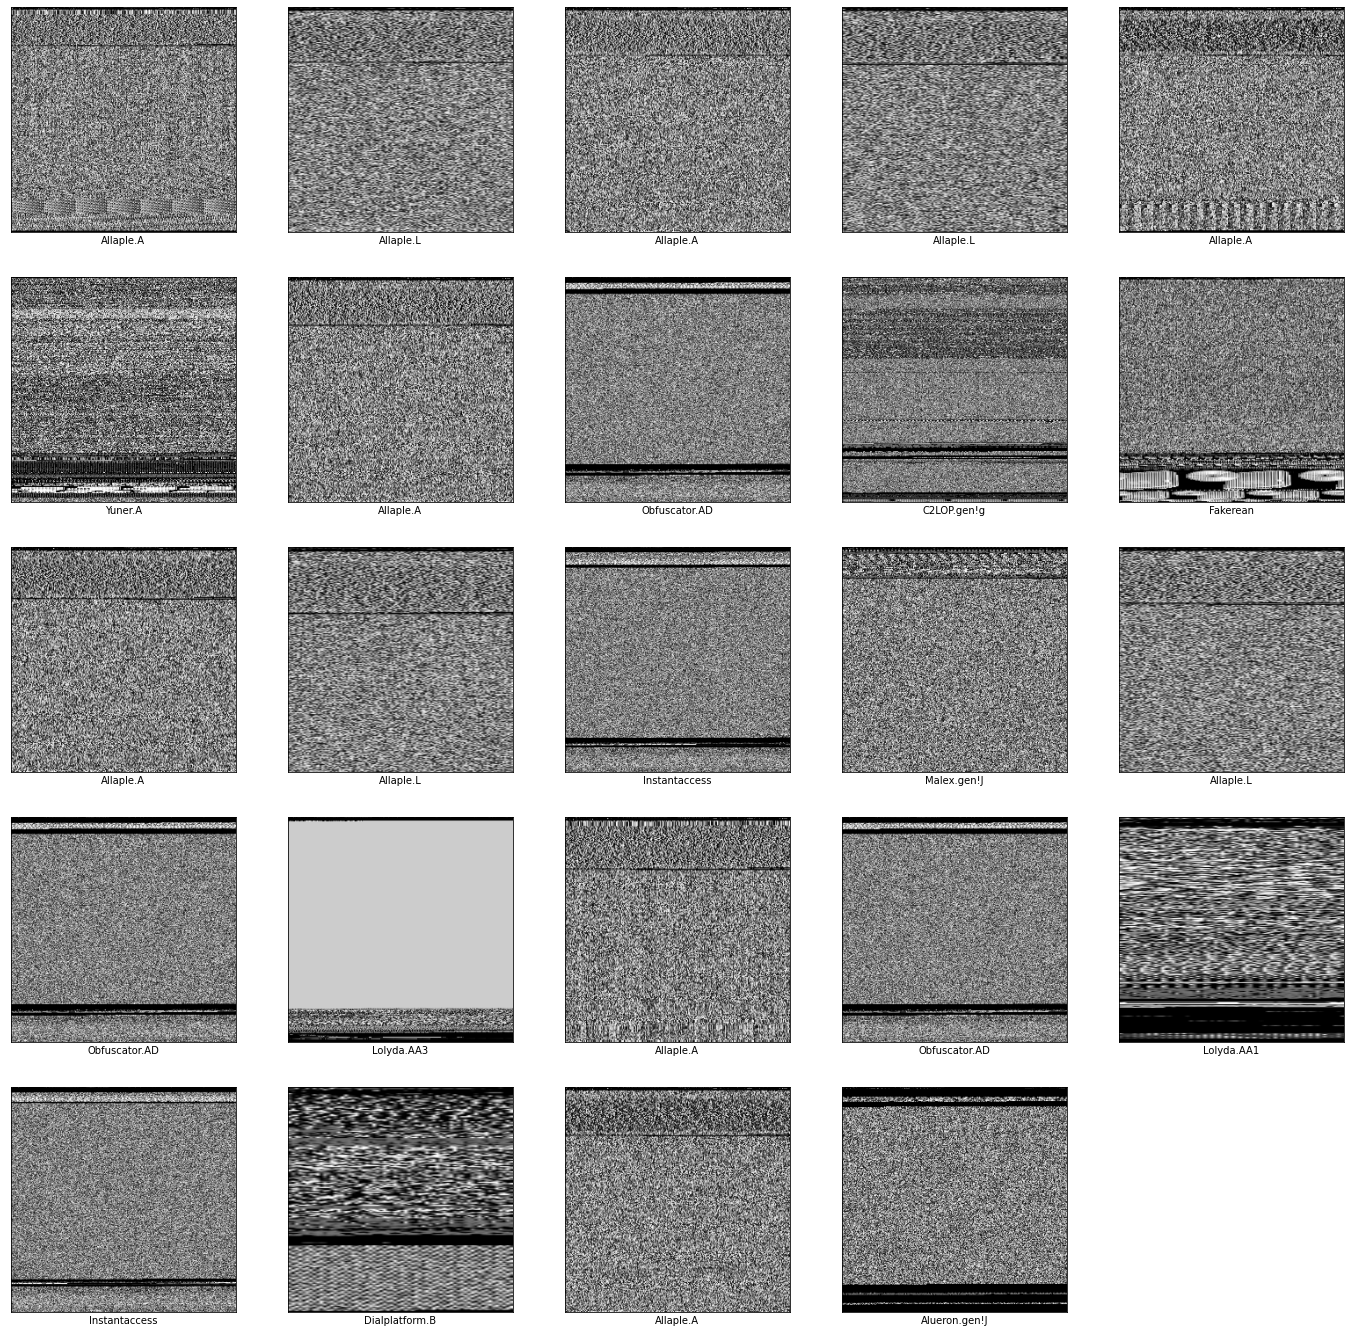

In [4]:
to_show = df.sample(24)

fig_size = (24, 24)
fig = plt.figure(figsize=fig_size)

img_counter = 1
for index, row in to_show.iterrows():
  plt.subplot(5, 5, img_counter)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)

  plt.imshow(row['image'].astype(np.uint8))
  plt.xlabel(row['className'])
  img_counter += 1

plt.show()

In [5]:
total_classes = np.unique(df.className)
number_of_total_classes = len(total_classes)
number_of_total_classes

25

In [6]:
images = np.array([row["image"].astype(np.uint8) for _, row in df.iterrows()])

In [7]:
y_train = df
x_train = images
y = np.zeros((len(df),25))
for index, row in df.iterrows():
  y[index][classes.index(row['className']) - 1] = 1

Text(0.5, 1.0, '0.0')

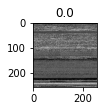

In [8]:
plt.subplot(345)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.title(y[1][0])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x_train, y, test_size = 0.3, random_state = 75)
model = Sequential()
model.add(Convolution2D(32, (3, 3), strides=(1, 1), input_shape=(256, 256, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(64, (3, 3), strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(128, (3, 3), strides=(1, 1), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(25, activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 flatten (Flatten)           (None, 460800)            0

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
history=model.fit(x = X_train, y = y_train, epochs = 5, batch_size = 16, validation_split = 0.1, verbose = 2)

Epoch 1/5
368/368 - 222s - loss: 34.8333 - accuracy: 0.7806 - val_loss: 1.4716 - val_accuracy: 0.5810 - 222s/epoch - 603ms/step
Epoch 2/5
368/368 - 218s - loss: 1.3010 - accuracy: 0.6196 - val_loss: 1.2281 - val_accuracy: 0.6560 - 218s/epoch - 593ms/step
Epoch 3/5
368/368 - 226s - loss: 0.8663 - accuracy: 0.7579 - val_loss: 0.6665 - val_accuracy: 0.9327 - 226s/epoch - 613ms/step
Epoch 4/5
368/368 - 220s - loss: 0.2834 - accuracy: 0.9327 - val_loss: 0.4501 - val_accuracy: 0.9327 - 220s/epoch - 597ms/step
Epoch 5/5
368/368 - 220s - loss: 0.1354 - accuracy: 0.9714 - val_loss: 0.8135 - val_accuracy: 0.9281 - 220s/epoch - 598ms/step


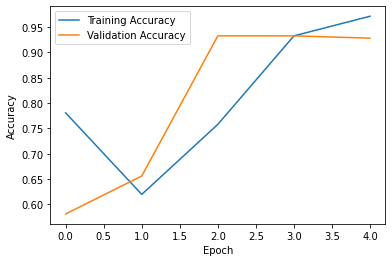

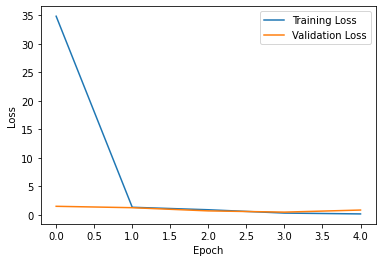

In [13]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
y_preds = model.predict(X_test, verbose=0)

In [15]:
def group_definition(df):
  Y_pred = []
  for row in df:
    max_value = max(row)
    max_index = list(row).index(max_value)
    Y_pred.append(max_index)
  return np.array(Y_pred).astype('int64')

Y_pred = group_definition(y_preds)
Y_test = group_definition(y_test)
classification_report(Y_pred, Y_test)

c:\Users\Oscar Paredez\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Oscar Paredez\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Oscar Paredez\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

'              precision    recall  f1-score   support\n\n           0       1.00      0.59      0.74        56\n           1       0.96      0.91      0.93       934\n           2       0.99      0.95      0.97       485\n           3       0.94      0.49      0.65       104\n           4       0.00      0.00      0.00        11\n           5       0.63      0.41      0.49        96\n           6       0.29      0.15      0.20        85\n           7       0.83      1.00      0.91        45\n           8       0.00      0.00      0.00         1\n           9       0.77      0.98      0.86        94\n          10       0.98      0.99      0.99       131\n          11       0.34      0.69      0.46        36\n          12       0.67      0.73      0.70        48\n          13       0.78      0.42      0.55        66\n          14       0.41      0.94      0.58        18\n          15       0.98      0.88      0.92        48\n          17       0.00      0.00      0.00         0\n       

In [16]:
confusion_matrix(Y_test, Y_pred)

array([[ 33,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 849,   8,   0,   0,   2,   3,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   5,   0,  19,   0,   0],
       [  0,   5, 459,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0,   0,  51,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  36],
       [  0,   4,   0,   0,   0,  39,   7,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   1,   0,   5,   3,   2,   0,   1],
       [  0,   8,   0,   0,   0,   7,  13,   0,   0,   0,   0,   1,   0,
          0,   0,   0,   0,   1,   0,   9,   6,   0,   0,   0],
       [  8,   1,   0,   0,   0,   0,   0

In [17]:
print('Accuracy:', accuracy_score(Y_test, Y_pred))

Accuracy: 0.8087080656673804


El resultado de 0.81 nos indica que en la generacion de imagenes se tuvo perdida de datos, es decir, las imagenes tuvieron que haberse generado de una mejor manera. Se cree que se pudo haber fallado en las capas y los parametros de las mismas utilizadas en la construccion del modelo.